In [21]:
import numpy as np
import os

# Directory containing the .npy files
data_dir_ml3d = '..\\HumanML3D'
data_dir_kit = '..\\KIT-ML'

# Load an example file
example_id_ml3d = "000002"
example_id_kit = "00001"

print("----new_joints----")

example_data_ml3d = np.load(os.path.join(data_dir_ml3d, "new_joints", example_id_ml3d + '.npy'))
print(f"ML3D: Shape of the example data: {example_data_ml3d.shape}")
print("ML3D: First frame of the example data (x, y, z coordinates for each joint):")
print(example_data_ml3d[0])

example_data_kit = np.load(os.path.join(data_dir_kit, "new_joints", example_id_kit + '.npy'))
print(f"KIT-ML: Shape of the example data: {example_data_kit.shape}")
# print("KIT-ML: First frame of the example data (x, y, z coordinates for each joint):")
# print(example_data_ml3d[0])

print("----new_joint_vecs----")
example_data_ml3d_vecs = np.load(os.path.join(data_dir_ml3d, "new_joint_vecs", example_id_ml3d + '.npy'))
example_data_kit_vecs = np.load(os.path.join(data_dir_kit, "new_joint_vecs", example_id_kit + '.npy'))
print(f"ML3D: Shape of the example data: {example_data_ml3d_vecs.shape}")
print(f"KIT-ML: Shape of the example data: {example_data_kit_vecs.shape}")



----new_joints----
ML3D: Shape of the example data: (82, 22, 3)
ML3D: First frame of the example data (x, y, z coordinates for each joint):
[[ 0.0000000e+00  9.5778775e-01  0.0000000e+00]
 [ 6.0979411e-02  8.7725866e-01 -2.0513855e-02]
 [-5.5912711e-02  8.6319381e-01 -3.2466277e-04]
 [-6.9574788e-03  1.0822042e+00 -4.2217683e-02]
 [ 1.2917742e-01  4.9143195e-01 -5.8277115e-02]
 [-1.1775966e-01  4.7842306e-01 -1.9644633e-02]
 [ 8.6959433e-03  1.2223053e+00 -1.7116047e-02]
 [ 9.1202728e-02  6.3010223e-02 -1.0312213e-01]
 [-1.0480286e-01  5.9495129e-02 -9.3832642e-02]
 [ 5.4150186e-03  1.2791973e+00 -1.0539668e-02]
 [ 1.5621158e-01  2.4716968e-02  1.8803254e-02]
 [-1.1756619e-01  2.3799257e-02  5.0697356e-02]
 [-3.7864968e-04  1.4970684e+00 -3.5389036e-02]
 [ 7.7318363e-02  1.3959972e+00 -2.0042669e-02]
 [-6.8262547e-02  1.3996547e+00 -3.5444945e-02]
 [-9.7887218e-04  1.5907385e+00  7.5371573e-03]
 [ 1.9393028e-01  1.3389504e+00 -4.1712195e-02]
 [-1.7322540e-01  1.3412765e+00 -6.1901316e-

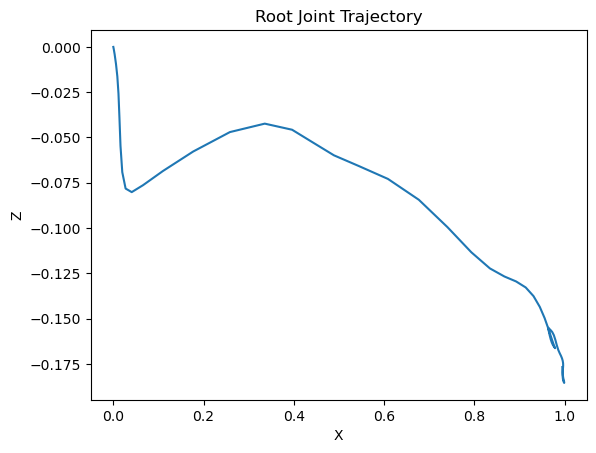

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from utils.motion_process import recover_from_ric
import torch
from utils.plot_script import plot_3d_motion
from utils.utils import motion_temporal_filter
%matplotlib inline

joints_num = 22
kinematic_chain_ml3d = [[0, 2, 5, 8, 11], [0, 1, 4, 7, 10], [0, 3, 6, 9, 12, 15], [9, 14, 17, 19, 21], [9, 13, 16, 18, 20]]
# print(example_data_ml3d[0:5])

joint = recover_from_ric(torch.from_numpy(example_data_ml3d_vecs).float(), joints_num).numpy()
trajectory = joint[:, 0, :]
# print(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 2])  # Plot X-Z movement
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Root Joint Trajectory')
plt.show()
# joint = motion_temporal_filter(joint, sigma=1)
# plot_3d_motion("test_ani.mp4", kinematic_chain, joint, title="Testing!", fps=20)


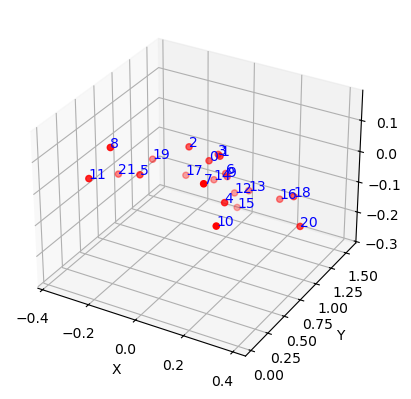

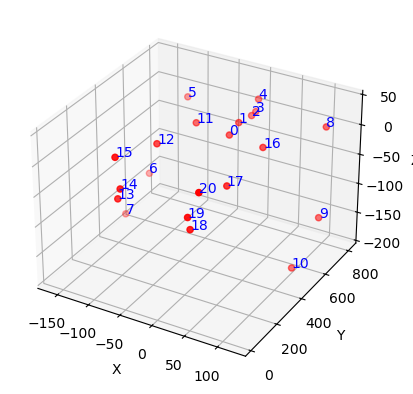

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_pose_3d(joint_positions):
    # print(joint_positions.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = joint_positions[:, 0], joint_positions[:, 1], joint_positions[:, 2]
    ax.scatter(x, y, z, c='r', marker='o')
    
    for i, coord in enumerate(zip(x, y, z)):
        ax.text(coord[0], coord[1], coord[2], f"{i}", color='blue')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Visualize the first frame
first_frame_ml3d = example_data_ml3d[0].reshape(-1, 3)
visualize_pose_3d(first_frame_ml3d)
first_frame_kit = example_data_kit[0].reshape(-1, 3)
visualize_pose_3d(first_frame_kit)


In [4]:
sys.path.append(os.path.dirname(os.path.dirname(__file__)))
import sys
import os
from os.path import join as pjoin
from  text_process import process_humanml3d

file = open(pjoin(data_dir_ml3d, "texts", "000000.txt"), "r", encoding="utf-8")
content = file.read()
print(content)

a man kicks something or someone with his left leg.#a/DET man/NOUN kick/VERB something/PRON or/CCONJ someone/PRON with/ADP his/DET left/ADJ leg/NOUN#0.0#0.0
the standing person kicks with their left foot before going back to their original stance.#the/DET stand/VERB person/NOUN kick/VERB with/ADP their/DET left/ADJ foot/NOUN before/ADP go/VERB back/ADV to/ADP their/DET original/ADJ stance/NOUN#0.0#0.0
a man kicks with something or someone with his left leg.#a/DET man/NOUN kick/VERB with/ADP something/PRON or/CCONJ someone/PRON with/ADP his/DET left/ADJ leg/NOUN#0.0#0.0
he is flying kick with his left leg#he/PRON is/AUX fly/VERB kick/NOUN with/ADP his/DET left/ADJ leg/NOUN#0.0#0.0

